Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\saran/.cache\torch\hub\checkpoints\resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 53.2MB/s]
  0%|          | 0/997 [00:00<?, ?it/s]

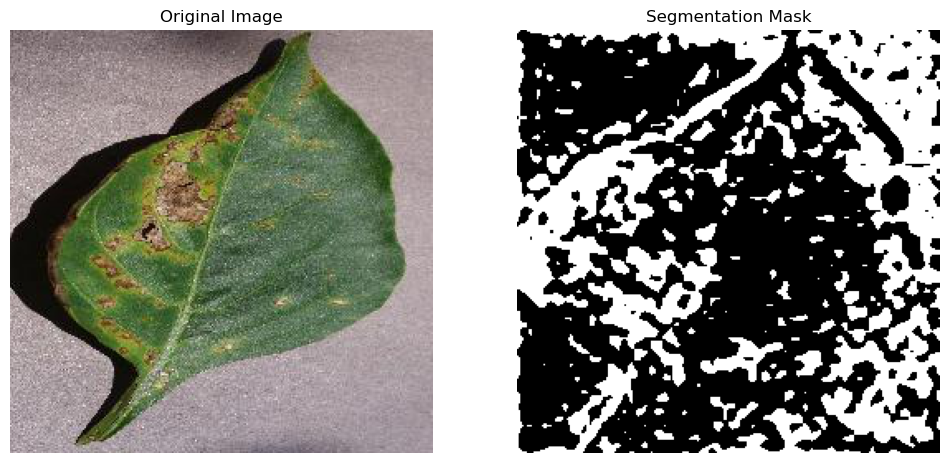

  0%|          | 1/997 [00:00<06:15,  2.65it/s]

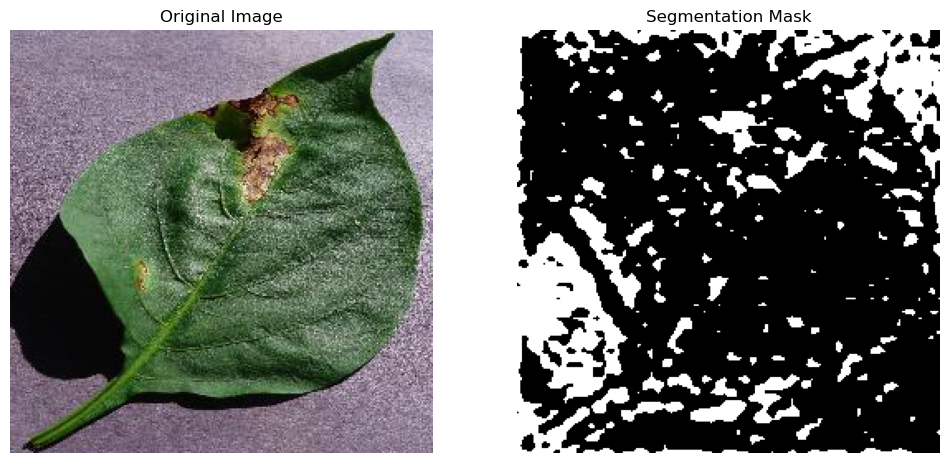

  0%|          | 2/997 [00:00<06:15,  2.65it/s]

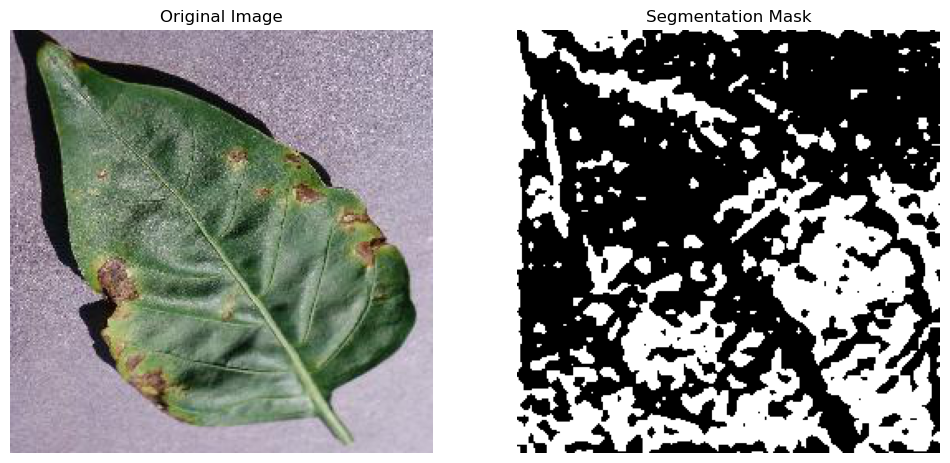

  0%|          | 2/997 [00:01<09:38,  1.72it/s]


In [14]:
import os
import torch
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision import models
import segmentation_models_pytorch as smp
# Load a pre-trained segmentation model
model = smp.DeepLabV3Plus(
    encoder_name="resnet50",  # Change encoder to your preference
    encoder_weights="imagenet",
    classes=1,
    activation="sigmoid"
).eval()

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])




input_dir = "C:\workspace\Research\Diffusion\PlantAugmentation\PlantVillage\Pepper__bell___Bacterial_spot"
output_dir = "path/to/segmentation_masks"
os.makedirs(output_dir, exist_ok=True)


# Loop through images and generate segmentation masks
i = 0
for img_name in tqdm(os.listdir(input_dir)):
    i = i+1
    img_path = os.path.join(input_dir, img_name)
    img = Image.open(img_path).convert("RGB")  # Open image

    inp = transform(img).unsqueeze(0)  # Transform and add batch dimension
    
    # Assuming 'model' is your pre-trained segmentation model
    with torch.no_grad():
        output = model(inp)  # The model outputs a tensor with shape [batch_size, num_classes, height, width]
        output = output.squeeze(0)  # Remove the batch dimension, now shape is [num_classes, height, width]
    
    # If binary segmentation with sigmoid activation:
        mask = output[0].cpu().numpy()  # Take the first channel (for binary segmentation)

    # Save mask
    mask = (mask * 255).astype('uint8') 
    # mask_img.save(mask_path)
    
    # Display the image and mask side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display original image
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[0].axis("off")  # Hide axis

    # Display segmentation mask
    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title("Segmentation Mask")
    ax[1].axis("off")  # Hide axis

    plt.show()  # Show both images side by side
    if i==3:
        break
